# Feature Selection (backward and forward) for knn and random forest

In [65]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


def spotify(client_id, client_secret):
    # Authenticate
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    return sp

# Set up the credentials
with open('config.json') as config_file:
    config = json.load(config_file)

client_id = config['client_id']['0']
client_secret = config['client_secret']['0']

sp = spotify(client_id, client_secret)


## Functions for performing feature selection for knn and random forest

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def perform_feature_selection_for_knn(feature_selection_method):    
    print(feature_selection_method + "feature selection for knn\n")
    for i in range(1, 12):
        feature_selection = SequentialFeatureSelector(knn,
                                        n_features_to_select=i, 
                                        direction=feature_selection_method, 
                                        scoring='accuracy', 
                                        cv=5, 
                                        n_jobs=-1).fit(X,y)
        
        # Get the indices of the selected features
        selected_features_indices = feature_selection.get_support(indices=True)
        
        # Get the names of the selected features
        selected_feature_names = [X.columns[i] for i in selected_features_indices]
        X_after_fs = X[selected_feature_names].copy()
        knn.fit(X_after_fs, y)
        pred = knn.predict(X_after_fs)
        correct_predictions = (y == pred).sum()
        incorrect_predictions = (y != pred).sum()
            
        print("n_features_to_select = " + str(i) + "\n")
        print(f"Correct predictions: {correct_predictions}")
        print(f"Incorrect predictions: {incorrect_predictions} \n")


def perform_feature_selection_for_rf(feature_selection_method):    
    for i in range(1, 12):
        feature_selection = SequentialFeatureSelector(rf,
                                        n_features_to_select=i, 
                                        direction=feature_selection_method, 
                                        scoring='accuracy', 
                                        cv=5, 
                                        n_jobs=-1).fit(X, y)
        
        # Get the indices of the selected features
        selected_features_indices = feature_selection.get_support(indices=True)
        
        # Get the names of the selected features
        selected_feature_names = [X.columns[i] for i in selected_features_indices]
        X_after_bs = X[selected_feature_names].copy()
        
        # Train the RandomForest model on the selected features
        rf.fit(X_after_bs, y)
        
        # Predict on the test set using the selected features
        y_pred = rf.predict(X_after_bs)
        
        # Evaluate the model
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')
        f1 = f1_score(y, y_pred, average='macro')
        
        print(f"n_features_to_select = {i}")
        print(f"Selected Feature Names: {selected_feature_names}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}\n")
        correct_predictions = (y == y_pred).sum()
        incorrect_predictions = (y != y_pred).sum()
        print(f"Correct predictions: {correct_predictions}")
        print(f"Incorrect predictions: {incorrect_predictions} \n")


## Importing training dataset and data cleaning

In [67]:
df = pd.read_csv("my_songs.csv")
df

,Unnamed: 0,playlist,id,name,genre,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Its time,2FoahzOSxJnalPA8aBUme3,all of me,Rap,0.652,0.80600,5,-5.707,0,...,0.000011,0.8420,0.779,159.947,audio_features,spotify:track:2FoahzOSxJnalPA8aBUme3,https://api.spotify.com/v1/tracks/2FoahzOSxJna...,https://api.spotify.com/v1/audio-analysis/2Foa...,198293,4
1,1,Its time,6x9pCndnXEoea0CMcfjs9W,n.h.i.e.,Rap,0.818,0.51200,5,-9.056,0,...,0.037100,0.1100,0.153,131.974,audio_features,spotify:track:6x9pCndnXEoea0CMcfjs9W,https://api.spotify.com/v1/tracks/6x9pCndnXEoe...,https://api.spotify.com/v1/audio-analysis/6x9p...,143719,4
2,2,Its time,2FDTHlrBguDzQkp7PVj16Q,Sprinter,Rap,0.918,0.68100,1,-4.705,1,...,0.000000,0.0615,0.706,139.057,audio_features,spotify:track:2FDTHlrBguDzQkp7PVj16Q,https://api.spotify.com/v1/tracks/2FDTHlrBguDz...,https://api.spotify.com/v1/audio-analysis/2FDT...,229133,4
3,3,Its time,5KI7I4mEtulXcv5VQJaV35,just like me,Rap,0.701,0.65300,1,-4.695,1,...,0.000028,0.3060,0.505,82.984,audio_features,spotify:track:5KI7I4mEtulXcv5VQJaV35,https://api.spotify.com/v1/tracks/5KI7I4mEtulX...,https://api.spotify.com/v1/audio-analysis/5KI7...,231338,4
4,4,Its time,4yLyVdEqV790aIXyGif85v,red sky,Rap,0.474,0.62100,7,-8.253,0,...,0.000000,0.1600,0.396,114.314,audio_features,spotify:track:4yLyVdEqV790aIXyGif85v,https://api.spotify.com/v1/tracks/4yLyVdEqV790...,https://api.spotify.com/v1/audio-analysis/4yLy...,176835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,284,Old,6crfO56bDm0RjpctUuGs5X,I'm In The Mood For Love,Old,0.580,0.05450,9,-14.594,0,...,0.000265,0.0967,0.177,123.341,audio_features,spotify:track:6crfO56bDm0RjpctUuGs5X,https://api.spotify.com/v1/tracks/6crfO56bDm0R...,https://api.spotify.com/v1/audio-analysis/6crf...,149827,4
285,285,Old,4l9hml2UCnxoNI3yCdL1BW,My Funny Valentine,Old,0.438,0.00756,0,-26.440,0,...,0.006430,0.1090,0.277,133.320,audio_features,spotify:track:4l9hml2UCnxoNI3yCdL1BW,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133,4
286,286,Old,7Kqk5EpwqiukPkDutSFFZk,Did I Remember,Old,0.677,0.26400,8,-9.111,1,...,0.006010,0.0825,0.438,120.974,audio_features,spotify:track:7Kqk5EpwqiukPkDutSFFZk,https://api.spotify.com/v1/tracks/7Kqk5Epwqiuk...,https://api.spotify.com/v1/audio-analysis/7Kqk...,206653,4
287,287,Old,1sJnKCMOkGvcRPes8Tln2x,My Kind of Night,Old,0.840,0.17800,10,-11.133,1,...,0.000000,0.1130,0.529,114.412,audio_features,spotify:track:1sJnKCMOkGvcRPes8Tln2x,https://api.spotify.com/v1/tracks/1sJnKCMOkGvc...,https://api.spotify.com/v1/audio-analysis/1sJn...,123711,4


In [68]:
drop_columns = ['Unnamed: 0', 'playlist', 'type', 'id', 'name', 'uri', 'track_href', 'analysis_url']

df_knn = df.drop(columns=drop_columns)

df_knn

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Rap,0.652,0.80600,5,-5.707,0,0.3020,0.1220,0.000011,0.8420,0.779,159.947,198293,4
1,Rap,0.818,0.51200,5,-9.056,0,0.0884,0.0963,0.037100,0.1100,0.153,131.974,143719,4
2,Rap,0.918,0.68100,1,-4.705,1,0.2010,0.2630,0.000000,0.0615,0.706,139.057,229133,4
3,Rap,0.701,0.65300,1,-4.695,1,0.1050,0.4790,0.000028,0.3060,0.505,82.984,231338,4
4,Rap,0.474,0.62100,7,-8.253,0,0.1030,0.1870,0.000000,0.1600,0.396,114.314,176835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Old,0.580,0.05450,9,-14.594,0,0.0473,0.9630,0.000265,0.0967,0.177,123.341,149827,4
285,Old,0.438,0.00756,0,-26.440,0,0.0382,0.9410,0.006430,0.1090,0.277,133.320,141133,4
286,Old,0.677,0.26400,8,-9.111,1,0.0357,0.9040,0.006010,0.0825,0.438,120.974,206653,4
287,Old,0.840,0.17800,10,-11.133,1,0.0700,0.9730,0.000000,0.1130,0.529,114.412,123711,4


## Scaling features and train test split training data

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
scaler.fit(df_knn.drop('genre', axis = 1))

StandardScaler()

In [72]:
scaled_features = scaler.transform(df_knn.drop('genre', axis = 1))

In [73]:
df_feat = pd.DataFrame(scaled_features, columns = df_knn.columns[1:])
df_feat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.298154,1.909276,0.014842,0.928430,-1.266335,1.970345,-1.320475,-0.409573,6.097448,2.244916,1.484358,-0.008676,0.32655
1,1.212476,0.673546,0.014842,0.446438,-1.266335,-0.122286,-1.392112,-0.277711,-0.472223,-1.014116,0.607365,-0.770294,0.32655
2,1.763272,1.383880,-1.128989,1.072639,0.789681,0.980852,-0.927450,-0.409612,-0.907508,1.864869,0.829427,0.421717,0.32655
3,0.568044,1.266192,-1.128989,1.074078,0.789681,0.040344,-0.325370,-0.409511,1.286869,0.818438,-0.928541,0.452489,0.32655
4,-0.682263,1.131691,0.586758,0.562007,-1.266335,0.020750,-1.139293,-0.409612,-0.023475,0.250971,0.053699,-0.308137,0.32655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.098419,-1.249400,1.158674,-0.350597,-1.266335,-0.524941,1.023737,-0.408669,-0.591590,-0.889170,0.336708,-0.685052,0.32655
285,-0.880550,-1.446696,-1.414947,-2.055487,-1.266335,-0.614093,0.962414,-0.386751,-0.481198,-0.368557,0.649564,-0.806383,0.32655
286,0.435853,-0.368838,0.872716,0.438522,0.789681,-0.638586,0.859280,-0.388244,-0.719034,0.469628,0.262499,0.107993,0.32655
287,1.333651,-0.730309,1.444631,0.147514,0.789681,-0.302550,1.051611,-0.409612,-0.445298,0.943385,0.056771,-1.049519,0.32655


In [74]:
X = df_feat
y = df_knn['genre']

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)
X.shape

(289, 13)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

## Try to select 9 features using forward selection (knn) to see which features are selected

In [77]:
forward_feature_selection = SequentialFeatureSelector(knn,
                                n_features_to_select=9, 
                                direction='forward', 
                                scoring='accuracy', 
                                cv=5, 
                                n_jobs=-1).fit(X,y)

# Get the indices of the selected features
selected_features_indices = forward_feature_selection.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [X_train.columns[i] for i in selected_features_indices]

print("Selected Feature Names:", selected_feature_names)


Selected Feature Names: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']


## Test how our model does when trained only using these 9 features compared with all the features like in knn-traintestsplit.ipynb

In [78]:
X_after_fs = X[selected_feature_names].copy()
X_after_fs

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms
0,0.298154,1.909276,0.928430,1.970345,-1.320475,-0.409573,6.097448,1.484358,-0.008676
1,1.212476,0.673546,0.446438,-0.122286,-1.392112,-0.277711,-0.472223,0.607365,-0.770294
2,1.763272,1.383880,1.072639,0.980852,-0.927450,-0.409612,-0.907508,0.829427,0.421717
3,0.568044,1.266192,1.074078,0.040344,-0.325370,-0.409511,1.286869,-0.928541,0.452489
4,-0.682263,1.131691,0.562007,0.020750,-1.139293,-0.409612,-0.023475,0.053699,-0.308137
...,...,...,...,...,...,...,...,...,...
284,-0.098419,-1.249400,-0.350597,-0.524941,1.023737,-0.408669,-0.591590,0.336708,-0.685052
285,-0.880550,-1.446696,-2.055487,-0.614093,0.962414,-0.386751,-0.481198,0.649564,-0.806383
286,0.435853,-0.368838,0.438522,-0.638586,0.859280,-0.388244,-0.719034,0.262499,0.107993
287,1.333651,-0.730309,0.147514,-0.302550,1.051611,-0.409612,-0.445298,0.056771,-1.049519


In [79]:
knn.fit(X_after_fs, y)

KNeighborsClassifier(n_neighbors=14)

In [80]:
pred = knn.predict(X_after_fs)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, pred))

[[33  0  1  5  0  0]
 [ 0 22  6  7  0  1]
 [ 0 15 28  3  8 12]
 [ 1  5  2 26  0  0]
 [ 0  0  5  0 50  7]
 [ 0  1  9  1  4 37]]


In [82]:
print(classification_report(y, pred, zero_division=0))
correct_predictions = (y == pred).sum()
incorrect_predictions = (y != pred).sum()

print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")


              precision    recall  f1-score   support

   Classical       0.97      0.85      0.90        39
      Covers       0.51      0.61      0.56        36
        Easy       0.55      0.42      0.48        66
         Old       0.62      0.76      0.68        34
         Rap       0.81      0.81      0.81        62
         RnB       0.65      0.71      0.68        52

    accuracy                           0.68       289
   macro avg       0.68      0.69      0.68       289
weighted avg       0.68      0.68      0.68       289

Correct predictions: 196
Incorrect predictions: 93


## Perform feature selection for knn (backward and forward) when features is 1 to 12, to see which number of features has the best results

In [83]:
perform_feature_selection_for_knn('forward')

forwardfeature selection for knn

n_features_to_select = 1

Correct predictions: 153
Incorrect predictions: 136 

n_features_to_select = 2

Correct predictions: 172
Incorrect predictions: 117 

n_features_to_select = 3

Correct predictions: 178
Incorrect predictions: 111 

n_features_to_select = 4

Correct predictions: 183
Incorrect predictions: 106 

n_features_to_select = 5

Correct predictions: 183
Incorrect predictions: 106 

n_features_to_select = 6

Correct predictions: 182
Incorrect predictions: 107 

n_features_to_select = 7

Correct predictions: 194
Incorrect predictions: 95 

n_features_to_select = 8

Correct predictions: 194
Incorrect predictions: 95 

n_features_to_select = 9

Correct predictions: 196
Incorrect predictions: 93 

n_features_to_select = 10

Correct predictions: 189
Incorrect predictions: 100 

n_features_to_select = 11

Correct predictions: 188
Incorrect predictions: 101 



In [84]:
perform_feature_selection_for_knn('backward')

backwardfeature selection for knn

n_features_to_select = 1

Correct predictions: 153
Incorrect predictions: 136 

n_features_to_select = 2

Correct predictions: 157
Incorrect predictions: 132 

n_features_to_select = 3

Correct predictions: 180
Incorrect predictions: 109 

n_features_to_select = 4

Correct predictions: 176
Incorrect predictions: 113 

n_features_to_select = 5

Correct predictions: 182
Incorrect predictions: 107 

n_features_to_select = 6

Correct predictions: 187
Incorrect predictions: 102 

n_features_to_select = 7

Correct predictions: 183
Incorrect predictions: 106 

n_features_to_select = 8

Correct predictions: 184
Incorrect predictions: 105 

n_features_to_select = 9

Correct predictions: 184
Incorrect predictions: 105 

n_features_to_select = 10

Correct predictions: 188
Incorrect predictions: 101 

n_features_to_select = 11

Correct predictions: 187
Incorrect predictions: 102 



## Now train, test and split training data with random forest classifier and perform forward and backward selection to find out how much features is most optimal for the best accuracy

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_knn['genre'], test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier with the required parameters
rf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=4, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.5977011494252874
Precision: 0.6542022792022791
Recall: 0.5765802824626354
F1 Score: 0.5917834672407386
              precision    recall  f1-score   support

   Classical       1.00      0.92      0.96        13
      Covers       0.50      0.18      0.27        11
        Easy       0.23      0.46      0.31        13
         Old       0.78      0.64      0.70        11
         Rap       0.67      0.73      0.70        22
         RnB       0.75      0.53      0.62        17

    accuracy                           0.60        87
   macro avg       0.65      0.58      0.59        87
weighted avg       0.66      0.60      0.61        87



In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_knn['genre'], test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with the required parameters
rf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=4, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))


perform_feature_selection_for_rf('forward')


Accuracy: 0.6206896551724138
              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         6
      Covers       0.33      0.20      0.25         5
        Easy       0.45      0.42      0.43        12
         Old       0.83      0.71      0.77         7
         Rap       0.52      0.86      0.65        14
         RnB       0.78      0.50      0.61        14

    accuracy                           0.62        58
   macro avg       0.65      0.61      0.62        58
weighted avg       0.64      0.62      0.61        58

n_features_to_select = 1
Selected Feature Names: ['acousticness']
Accuracy: 0.6401384083044983
Precision: 0.6300134098248787
Recall: 0.6304417084777616
F1 Score: 0.6284441486809739

Correct predictions: 185
Incorrect predictions: 104 

n_features_to_select = 2
Selected Feature Names: ['acousticness', 'instrumentalness']
Accuracy: 0.7301038062283737
Precision: 0.7300800951542001
Recall: 0.7420481514409408
F1 Score: 0.73272950

In [87]:
perform_feature_selection_for_rf('forward')

n_features_to_select = 1
Selected Feature Names: ['acousticness']
Accuracy: 0.6401384083044983
Precision: 0.6300134098248787
Recall: 0.6304417084777616
F1 Score: 0.6284441486809739

Correct predictions: 185
Incorrect predictions: 104 

n_features_to_select = 2
Selected Feature Names: ['acousticness', 'instrumentalness']
Accuracy: 0.7301038062283737
Precision: 0.7300800951542001
Recall: 0.7420481514409408
F1 Score: 0.7327295059024636

Correct predictions: 211
Incorrect predictions: 78 

n_features_to_select = 3
Selected Feature Names: ['energy', 'acousticness', 'instrumentalness']
Accuracy: 0.7785467128027682
Precision: 0.7811190514648102
Recall: 0.786496490718502
F1 Score: 0.7816266999222137

Correct predictions: 225
Incorrect predictions: 64 

n_features_to_select = 4
Selected Feature Names: ['energy', 'mode', 'acousticness', 'instrumentalness']
Accuracy: 0.7923875432525952
Precision: 0.7946554999280968
Recall: 0.8001433347733157
F1 Score: 0.7955087198496161

Correct predictions: 229


In [88]:
perform_feature_selection_for_rf('backward')

n_features_to_select = 1
Selected Feature Names: ['acousticness']
Accuracy: 0.6401384083044983
Precision: 0.6300134098248787
Recall: 0.6304417084777616
F1 Score: 0.6284441486809739

Correct predictions: 185
Incorrect predictions: 104 

n_features_to_select = 2
Selected Feature Names: ['acousticness', 'instrumentalness']
Accuracy: 0.7301038062283737
Precision: 0.7300800951542001
Recall: 0.7420481514409408
F1 Score: 0.7327295059024636

Correct predictions: 211
Incorrect predictions: 78 

n_features_to_select = 3
Selected Feature Names: ['energy', 'acousticness', 'instrumentalness']
Accuracy: 0.7785467128027682
Precision: 0.7811190514648102
Recall: 0.786496490718502
F1 Score: 0.7816266999222137

Correct predictions: 225
Incorrect predictions: 64 

n_features_to_select = 4
Selected Feature Names: ['danceability', 'energy', 'acousticness', 'instrumentalness']
Accuracy: 0.7820069204152249
Precision: 0.7902913570602171
Recall: 0.792548533060867
F1 Score: 0.7903087832406274

Correct prediction

## Visualize the random forest tree to see how the model determines the results

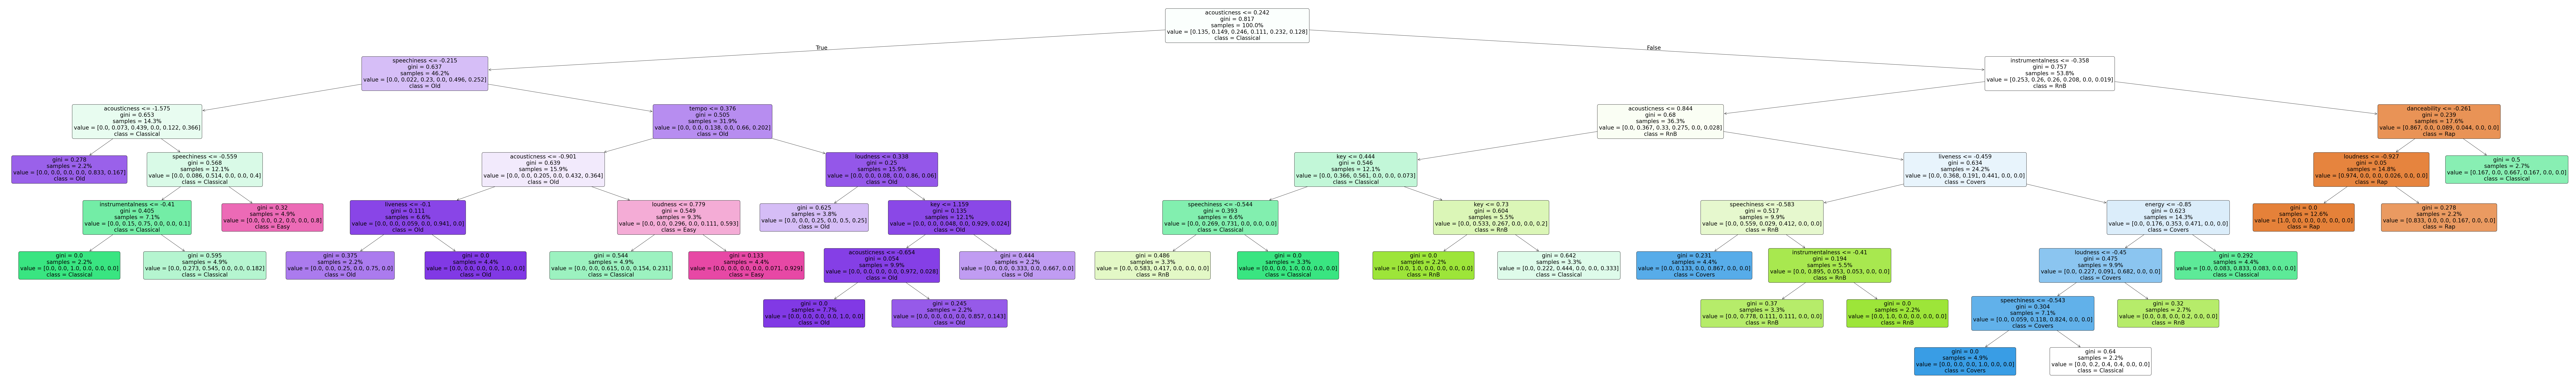

In [89]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Features and class names
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'tempo', 'time_signature']
genres = ['Rap', 'RnB', 'Classical', 'Covers', 'Old', 'Easy']

# Visualize a single decision tree
tree = rf.estimators_[0]

# Increase width and adjust the layout for more space between nodes
with PdfPages('output.pdf') as pdf:
    plt.figure(figsize=(200, 30))  # Increase the figure size for more spacing
    plot_tree(tree, feature_names=features, class_names=genres, filled=True, rounded=True, 
              fontsize=24, proportion=True)  # Use proportion=True for better spacing between nodes
    pdf.savefig()
    plt.show()
